# Student Performance Indicator

### Life cycle of Machine Learning Project
1. Understanding the problem statement
2. Data collection
3. Data checks to perform
4. Exploratory data analysis
5. Data pre-processing
6. Model Training
7. Choose best model

### 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas Dataframe

In [2]:
df = pd.read_csv('data\stud.csv')

#### Show top 5 records

In [3]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information
 - gender : sex of students -> (Male/female)
 - race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
 - parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
 - lunch : having lunch before test (standard or free/reduced)
 - test preparation course : complete or not complete before test
 - math score
 - reading score
 - writing score

### 3) Data Checks to perform 
 - Check Missing values
 - Check Duplicates
 - Check data type
 - Check the number of unique values of each column
 - Check statistics of data set
 - Check various categories present in the different categorical column

### 3.1 Checking missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Insights
 - There is no missing values in the dataset

### 3.2 Check duplicates

In [6]:
df.duplicated().sum()

0

#### Insights
 - There is no duplicate values in the dataset

### 3.3 Check data type

In [7]:
# check null and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of dataset

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
 - From above description of numerical data, all means are very close to each other - between 66 and 68.05;
 - All standard deviations are also close - between 14.6 and 15.19;
 - While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading = 17

### 3.6 Exploring Data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in 'gender' variable: ",end='')
print(df['gender'].unique())

print("Categories in 'race ethnicity' variable: ",end='')
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education': ",end='')
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ",end='')
print(df['lunch'].unique())

print("Categories in test preparation course: ",end='')
print(df['test_preparation_course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in test preparation course: ['none' 'completed']


In [12]:
# define numerical and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

#print numeric and categorical features
print('we have {} numerical features {}: '.format(len(numeric_features),numeric_features))
print('we have {} categorical features {}: '.format(len(categorical_features),categorical_features))

we have 3 numerical features ['math_score', 'reading_score', 'writing_score']: 
we have 5 categorical features ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']: 


### 3.7 Adding columns for "Total Score" and "Average"

In [13]:
df['total_score'] = df['reading_score']+df['writing_score']+df['math_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = len(df.loc[df['reading_score'] == 100])
writing_full = len(df.loc[df['writing_score'] == 100])
math_full = len(df.loc[df['math_score'] == 100])

print(f"Number of students with full mark in Maths:   {math_full}")
print(f"Number of students with full mark in Writing: {writing_full}")
print(f"Number of students with full mark in Reading: {reading_full}")

Number of students with full mark in Maths:   7
Number of students with full mark in Writing: 14
Number of students with full mark in Reading: 17


In [15]:
reading_less_20 = len(df.loc[df['reading_score'] < 20])
writing_less_20 = len(df.loc[df['writing_score'] < 20])
math_less_20 = len(df.loc[df['math_score'] < 20])

print(f"Number of students with less than 20 marks in Maths:   {math_less_20}")
print(f"Number of students with less than 20 marks in Writing: {writing_less_20}")
print(f"Number of students with less than 20 marks in Reading: {reading_less_20}")

Number of students with less than 20 marks in Maths:   4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#### Insights
 - from the above values we get students have performed the worst in Maths
 - Best performance in maths

### 4) Exploring Data (Visualization)

### 4.1 Visualize average score distribution/Total score distribution to make some conclusion
 - Histogram
 - Kernal Distribution Function (KDE)

#### 4.1.1 KDE and Histogram

<Axes: xlabel='average', ylabel='Count'>

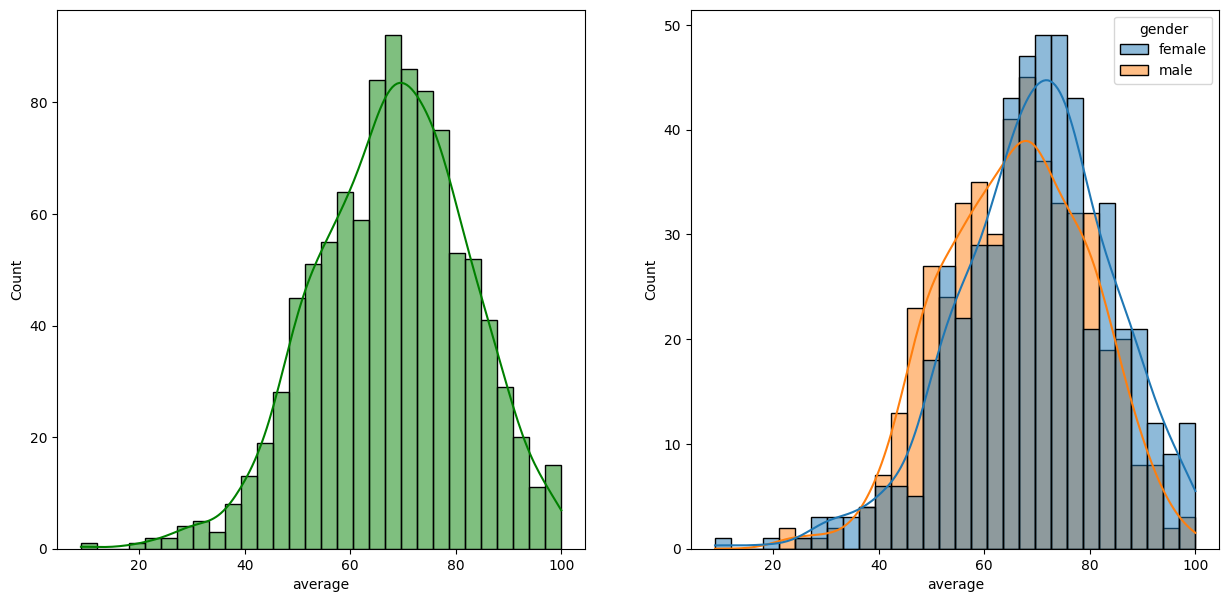

In [16]:
plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True,bins=30,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,bins=30,hue='gender')

<Axes: xlabel='total_score', ylabel='Count'>

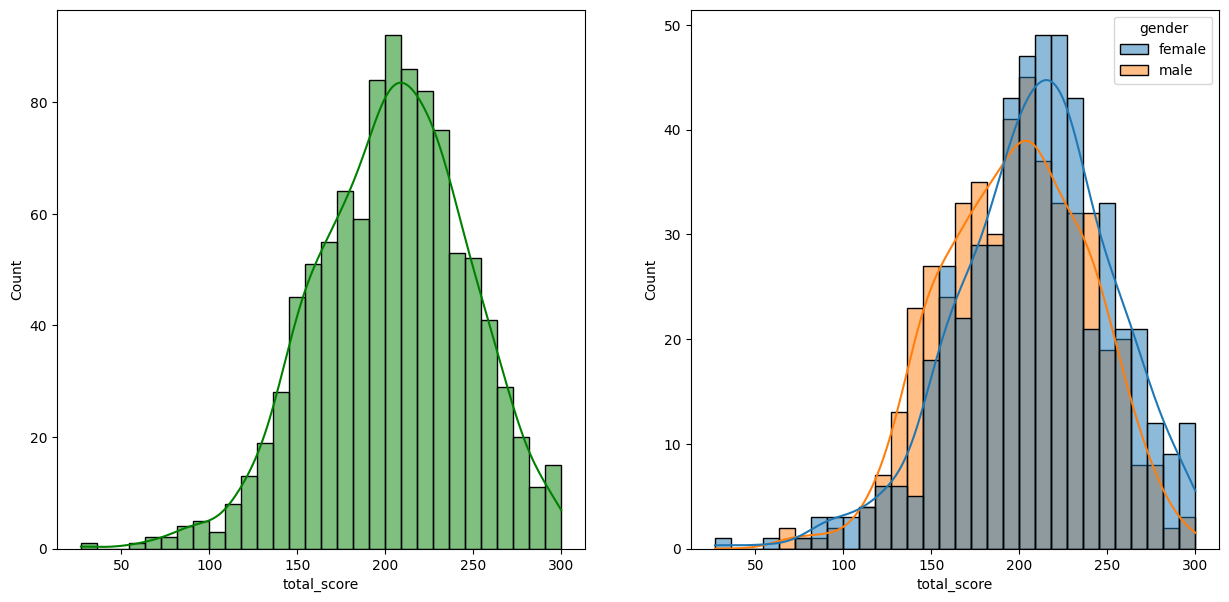

In [17]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',bins=30,kde=True,hue='gender')

#### Insights
 - Female students tends to perform well

### 4.2 Maximum score of students in all three subjects

<Axes: title={'center': 'WRITING SCORE'}, ylabel='writing_score'>

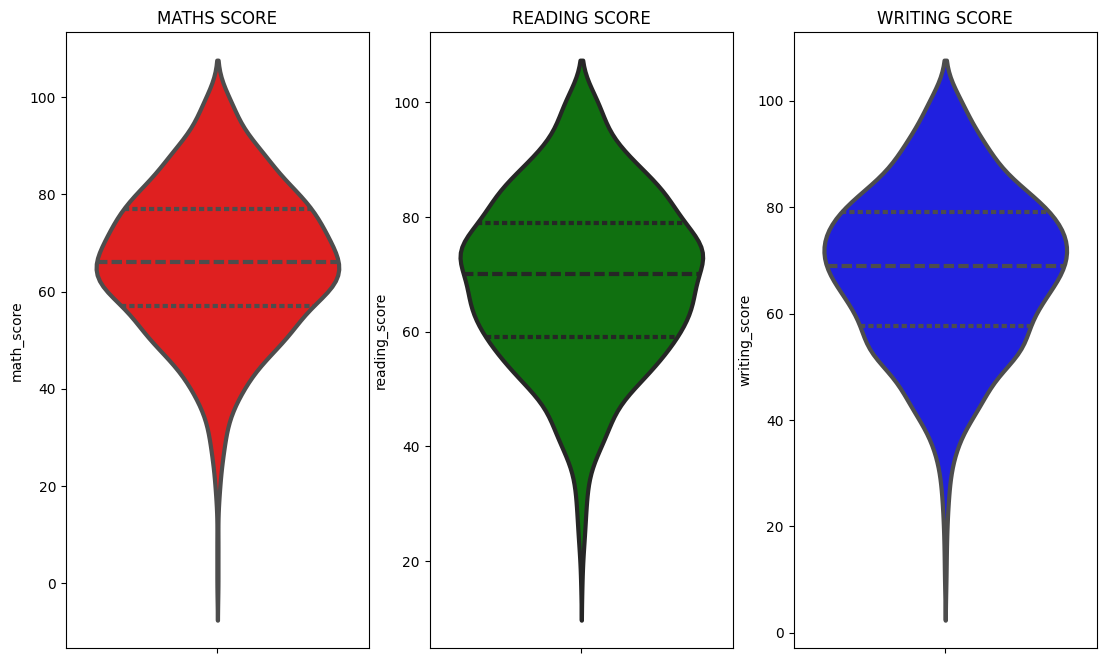

In [18]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATHS SCORE')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3,inner='quartile')
plt.subplot(1,4,2)
plt.title('READING SCORE')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3,inner='quartile')
plt.subplot(1,4,3)
plt.title('WRITING SCORE')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3,inner='quartile')


#### Insights
 - From the above three plots its clearly visible that most of the students score in between 58-77(approx) in Maths whereas in reading and writing most of them score from 60-80

### 4.3 Multivariate analysis using pyplot

(-1.25, 1.25, -1.25, 1.25)

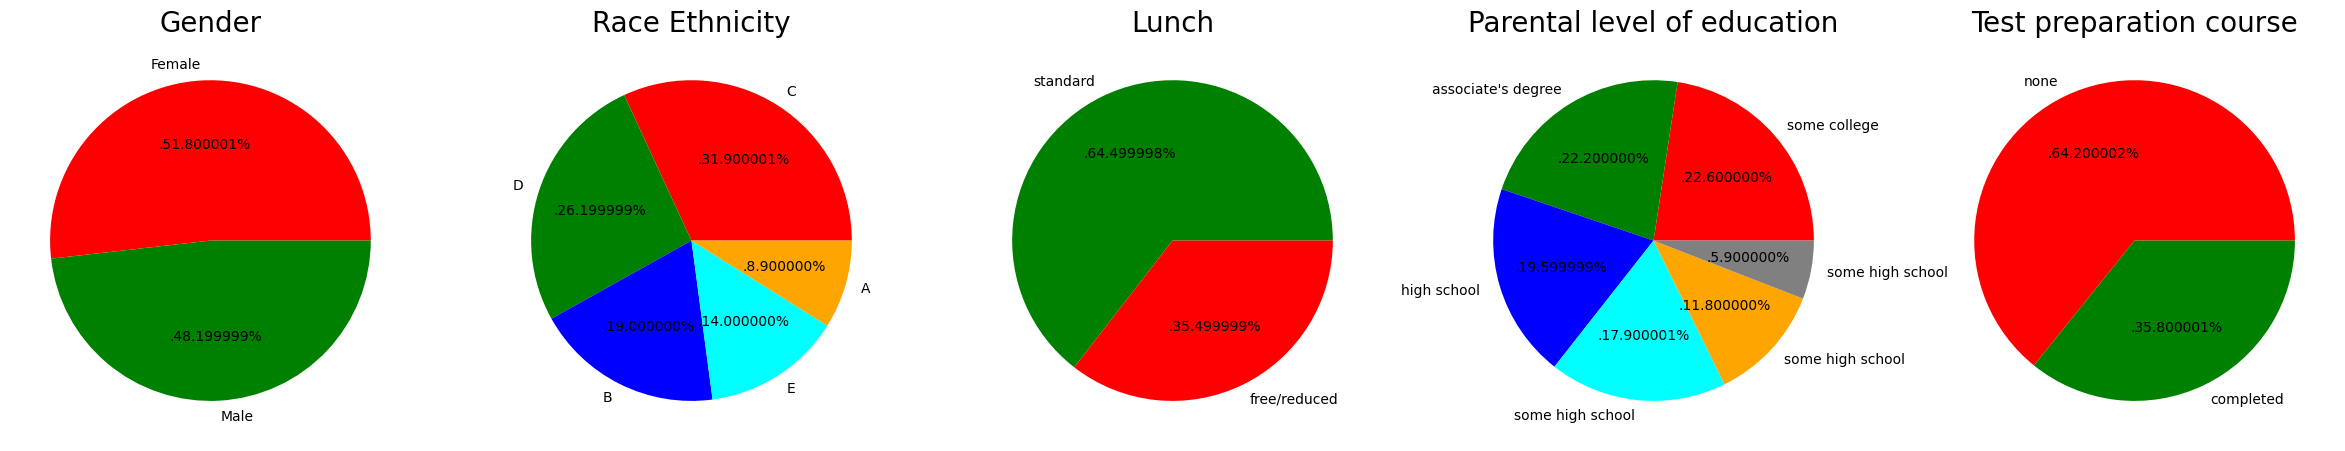

In [19]:
plt.rcParams['figure.figsize'] = (30,12)
# Gender
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['Red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')
# Race Ethnicity
plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'C','D','B','E','A'
color = ['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Race Ethnicity',fontsize=20)
plt.axis('off')
# Lunch
plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'standard','free/reduced'
color = ['green','red']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')
# Parental_level_of_education
plt.subplot(1,5,4)
size = df['parental_level_of_education'].value_counts()
labels = 'some college',"associate's degree",'high school ','some high school','some high school','some high school'
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Parental level of education',fontsize=20)
plt.axis('off')
# Test preparation course
plt.subplot(1,5,5)
size = df['test_preparation_course'].value_counts()
labels = 'none','completed'
color= ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Test preparation course',fontsize=20)
plt.axis('off')

#### Insights
 - Number of Male and Female are almost equal.
 - Number of students in group C is greater.
 - Number of students who have standard lunch are greater.
 - Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree".
 - Number of students who have not enrolled in any test preparation course is greater.


### 4.4 Feature wise visualization

#### 4.1.1 Gender Column
 - How is distribution of gender?
 - Is gender has any impact on student's performance?

#### Univariate Analysis (How is distribution of gender?)

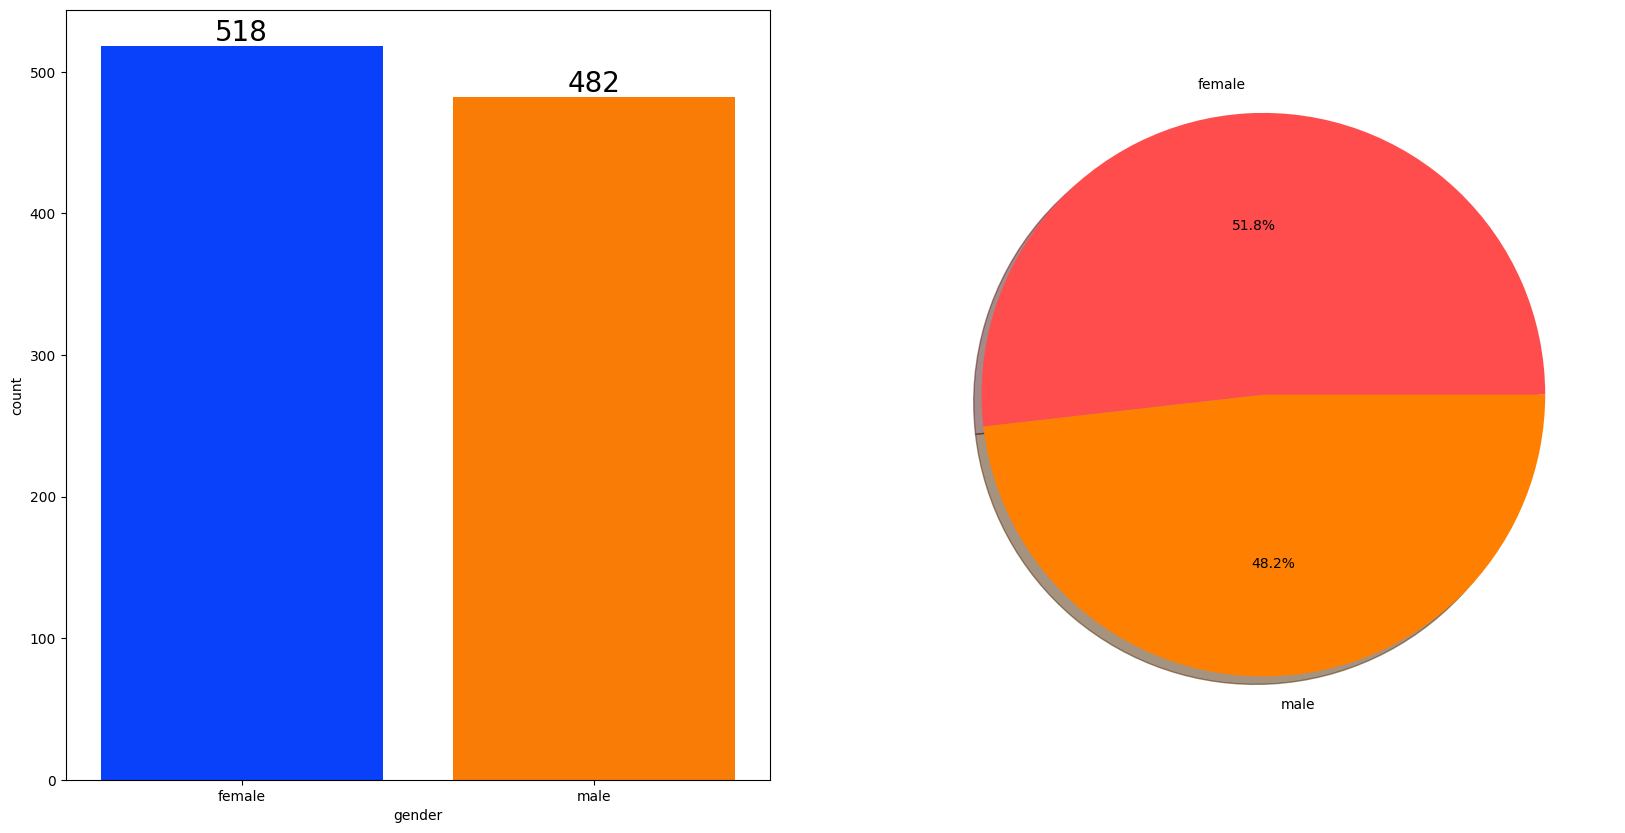

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['female','male'],shadow=True,colors=['#ff4d4d','#ff8000'],autopct='%1.1f%%')
plt.show()

In [21]:
df.dtypes

gender                          object
race_ethnicity                  object
parental_level_of_education     object
lunch                           object
test_preparation_course         object
math_score                       int64
reading_score                    int64
writing_score                    int64
total_score                      int64
average                        float64
dtype: object

In [22]:
pd.__version__

'1.4.4'

#### Insights
 - Gender has balanced data with female students are 518(51.8%) and male students 482(48.2%)

#### Bivariate Analysis (Is gender has any impact on student's performance)

In [23]:

gender_group = df.groupby('gender').mean()


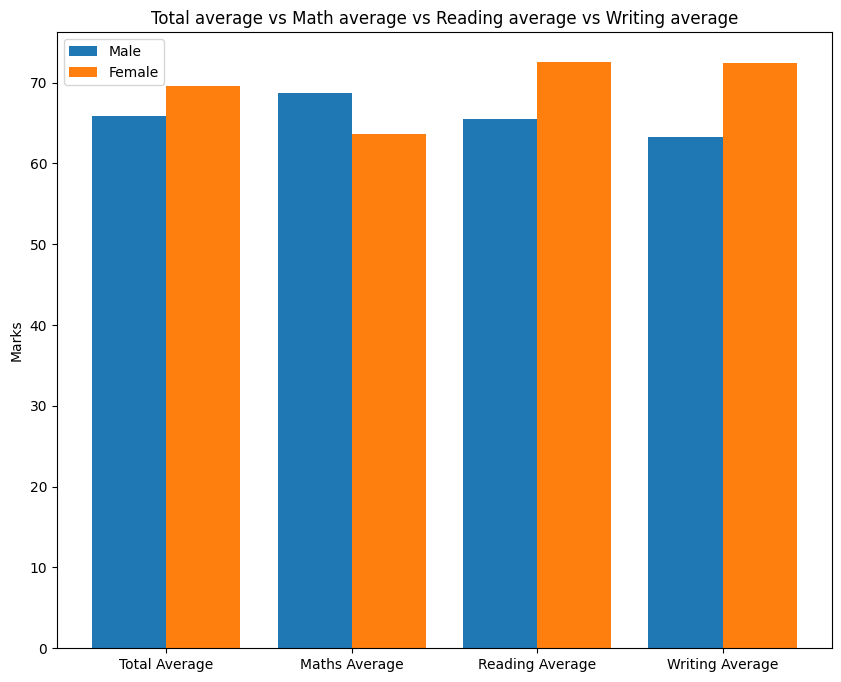

In [24]:
plt.figure(figsize=(10,8))

X = ['Total Average','Maths Average','Reading Average','Writing Average']

female_score = [gender_group['average'][0],gender_group['math_score'][0],gender_group['reading_score'][0],gender_group['writing_score'][0]]
male_score = [gender_group['average'][1],gender_group['math_score'][1],gender_group['reading_score'][1],gender_group['writing_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis-0.2,male_score,0.4,label='Male')
plt.bar(X_axis+0.2,female_score,0.4,label='Female')

plt.xticks(X_axis,X)
plt.ylabel('Marks')
plt.title('Total average vs Math average vs Reading average vs Writing average')
plt.legend()
plt.show()

#### Insights
 - On an average females better overall score(Total average),Reading score,Writing score
 - Whereas males have scored higher in maths

#### 4.4.2 RACE/ETHNICITY COLUMN
 - How is Group wise distribution?
 - Is Race/ethnicity has any impact on student's performance?

#### Univariate Analysis (How is Group wise distribution?)

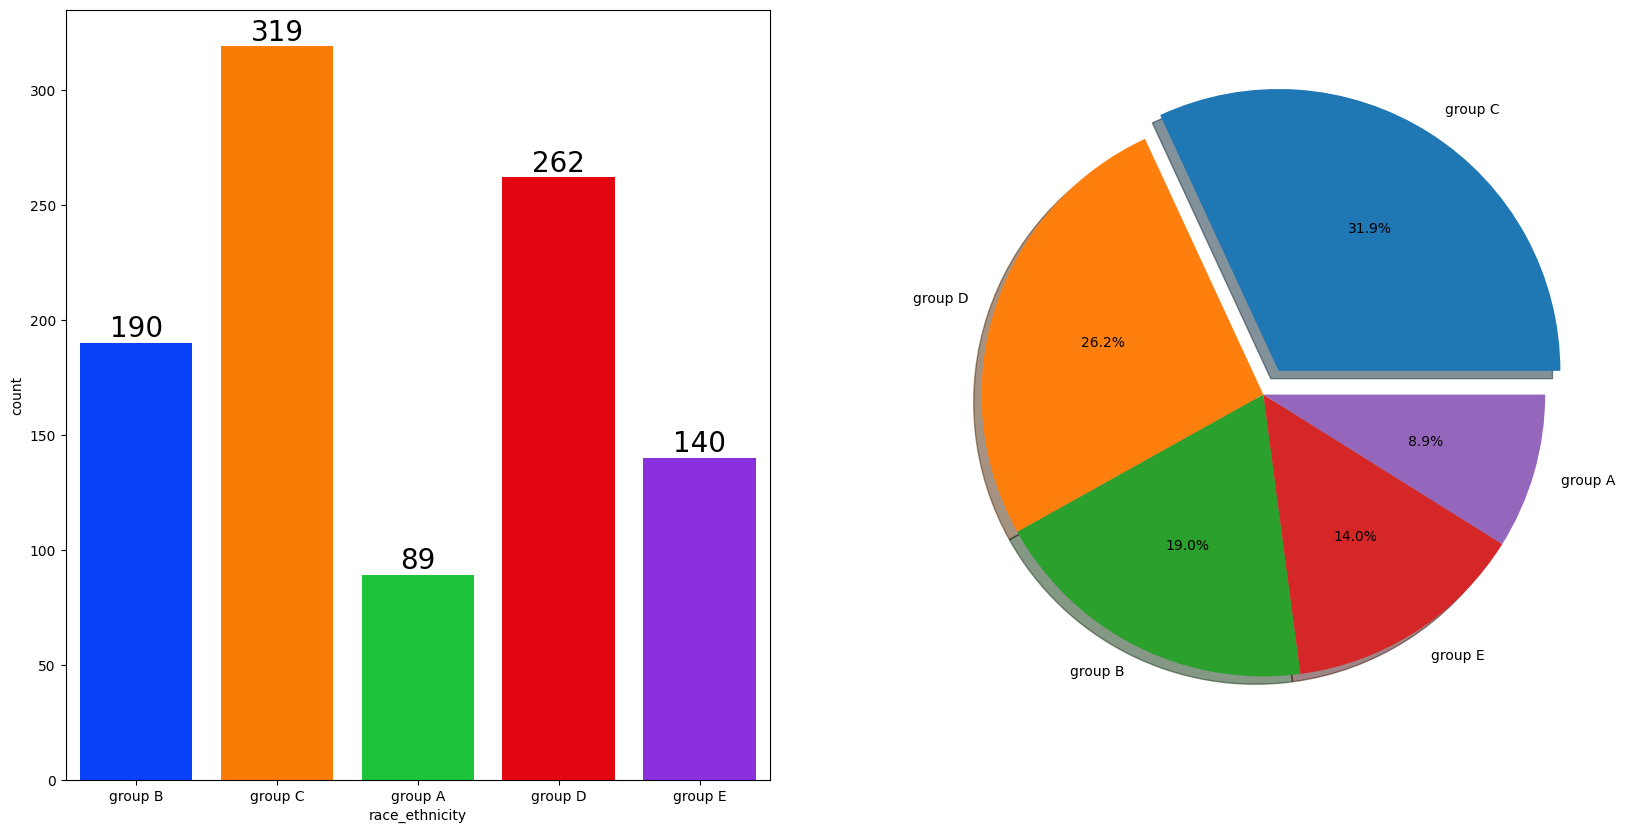

In [25]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],shadow=True,autopct='%1.1f%%')
plt.show()

#### Insights 
 - Most of students belongs to Group C/D.
 - Lowest number of students belongs to Group A

#### BIVARIATE ANALYSIS(Is Race/Ethnicity has any impact on student's performance?)

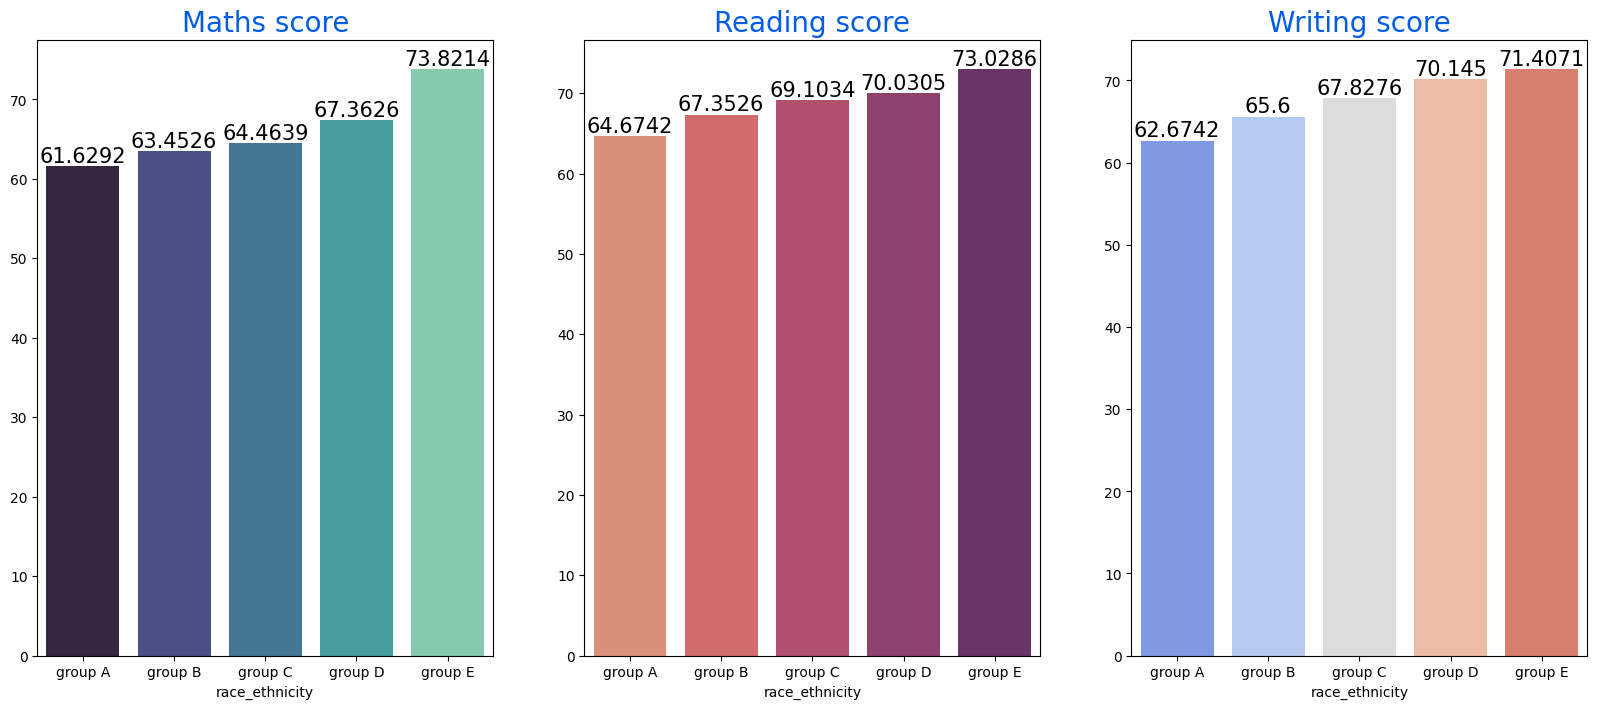

In [26]:
group_data2 = df.groupby('race_ethnicity')

f,ax = plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=group_data2['math_score'].mean().index,y=group_data2['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Maths score',color='#005ce6',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    
sns.barplot(x=group_data2['reading_score'].mean().index,y=group_data2['reading_score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)
    
sns.barplot(x=group_data2['writing_score'].mean().index,y=group_data2['writing_score'].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights
 - Group E students have scored the highest marks.
 - Group A students have scored the lowest marks.

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
 - What is the educational background of student's parent?
 - Is parental education has any impact on student's performance?

#### UNIVARIATE ANALYSIS(What is the educational background of student's parent?)

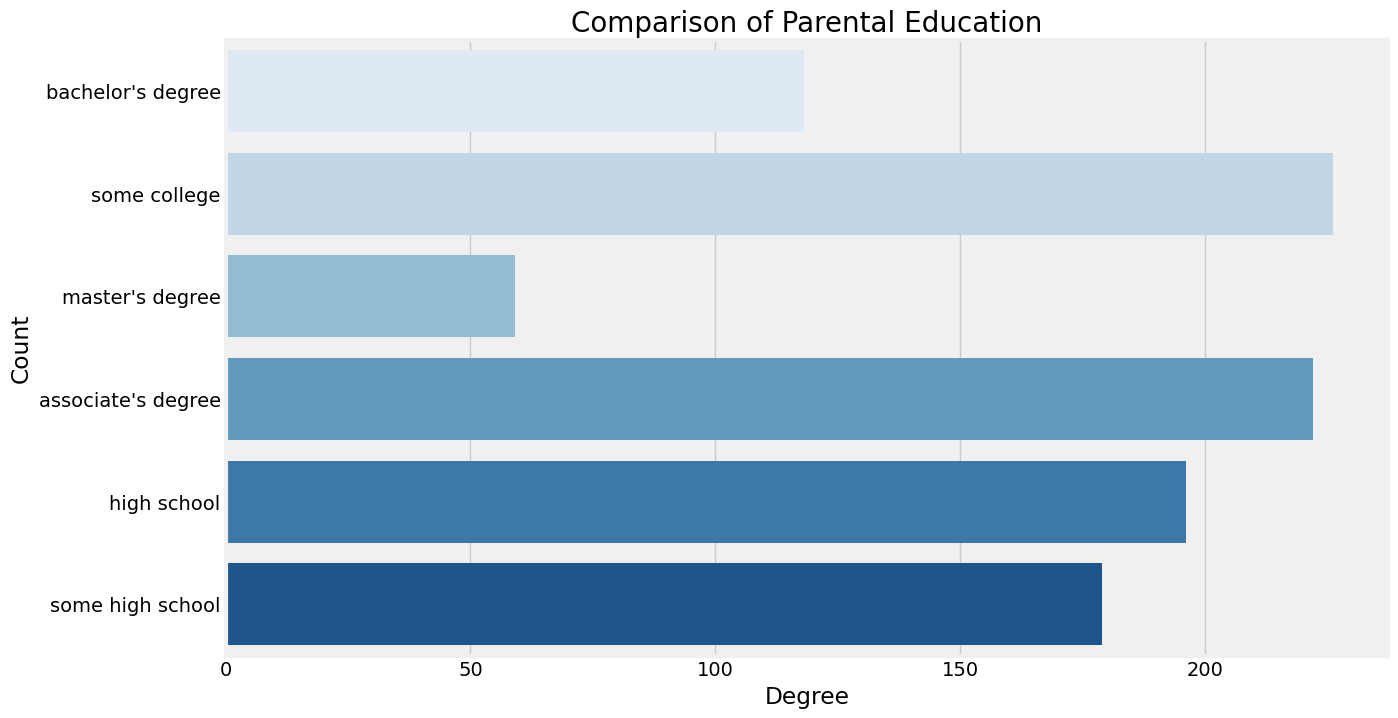

In [27]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'],palette='Blues')
plt.title('Comparison of Parental Education',fontweight=30,fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

#### Insights
 - Largest number of parents are from some college

#### BIVARIATE ANALYSIS (Is parental education has any impact on student's performance?)

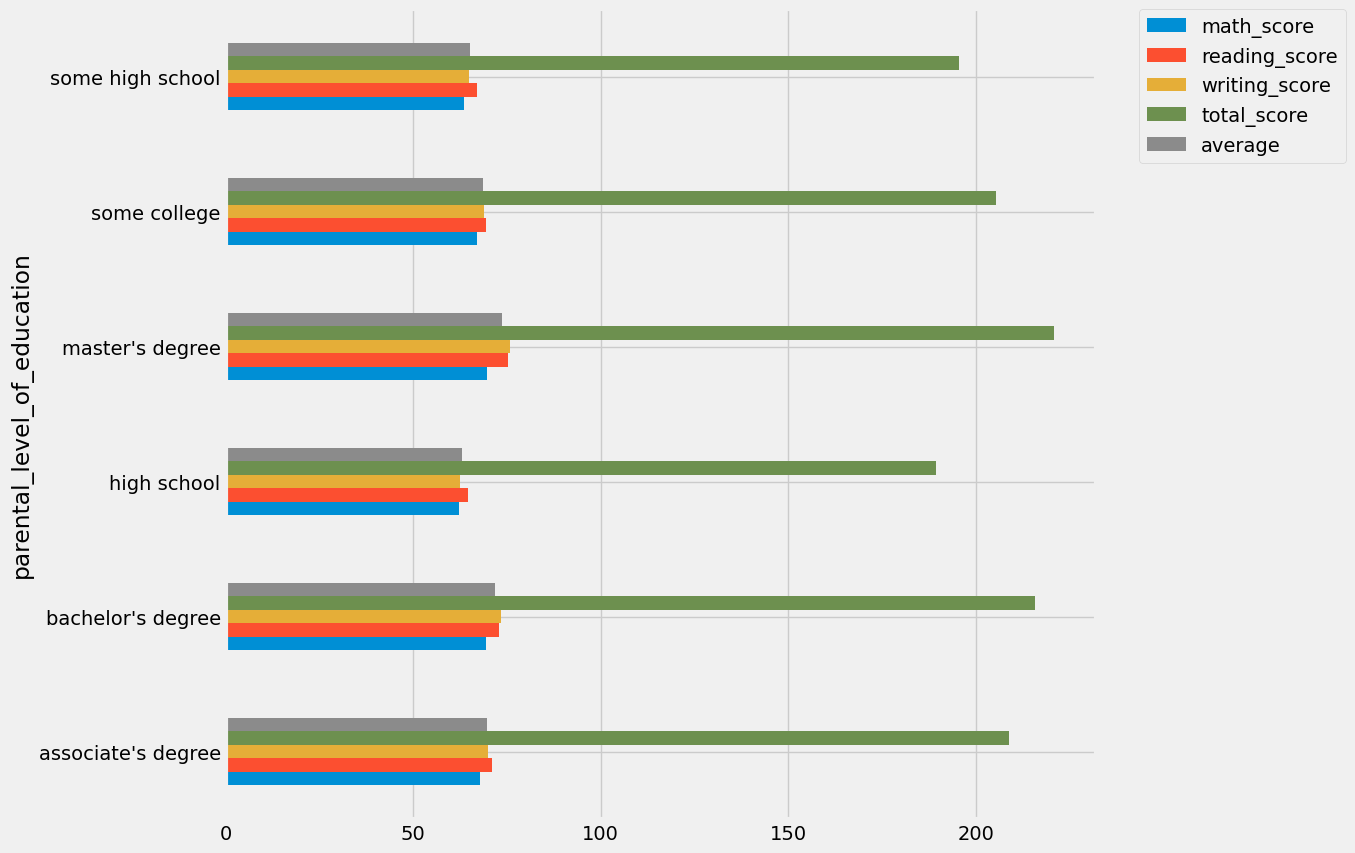

In [28]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)
plt.show()

#### Insights
 - The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN
 - Which type of lunch is common among all the students?
 - What is the effect of lunch type on test results?

#### UNIVARIATE ANLYSIS(Which type of lunch is common among all the students?)

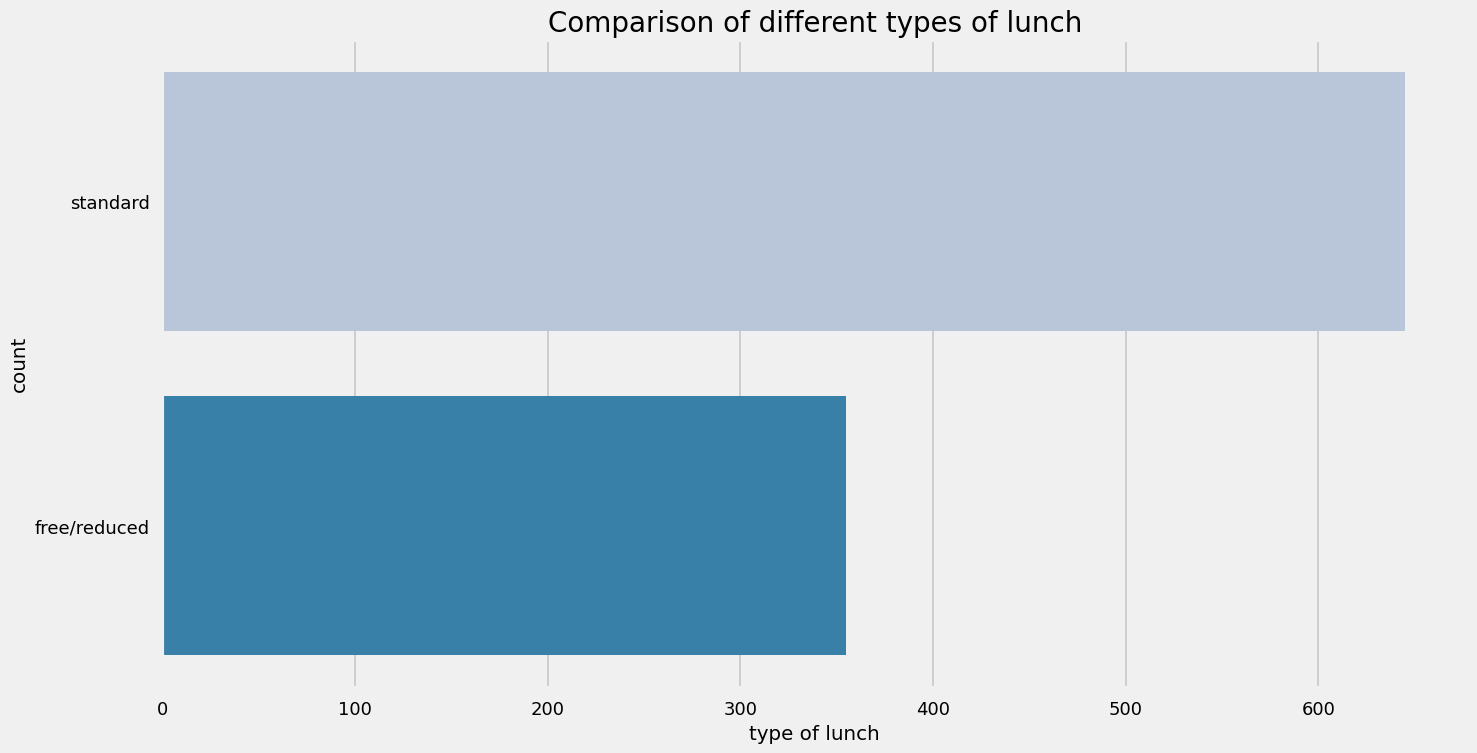

In [29]:
plt.figure(figsize=(15,8))
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'],palette='PuBu')
plt.title('Comparison of different types of lunch',fontweight=30,fontsize=20)
plt.xlabel('type of lunch')
plt.ylabel('count')
plt.show()

#### Insights
 - Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS(What is the effect of lunch type on test results?)

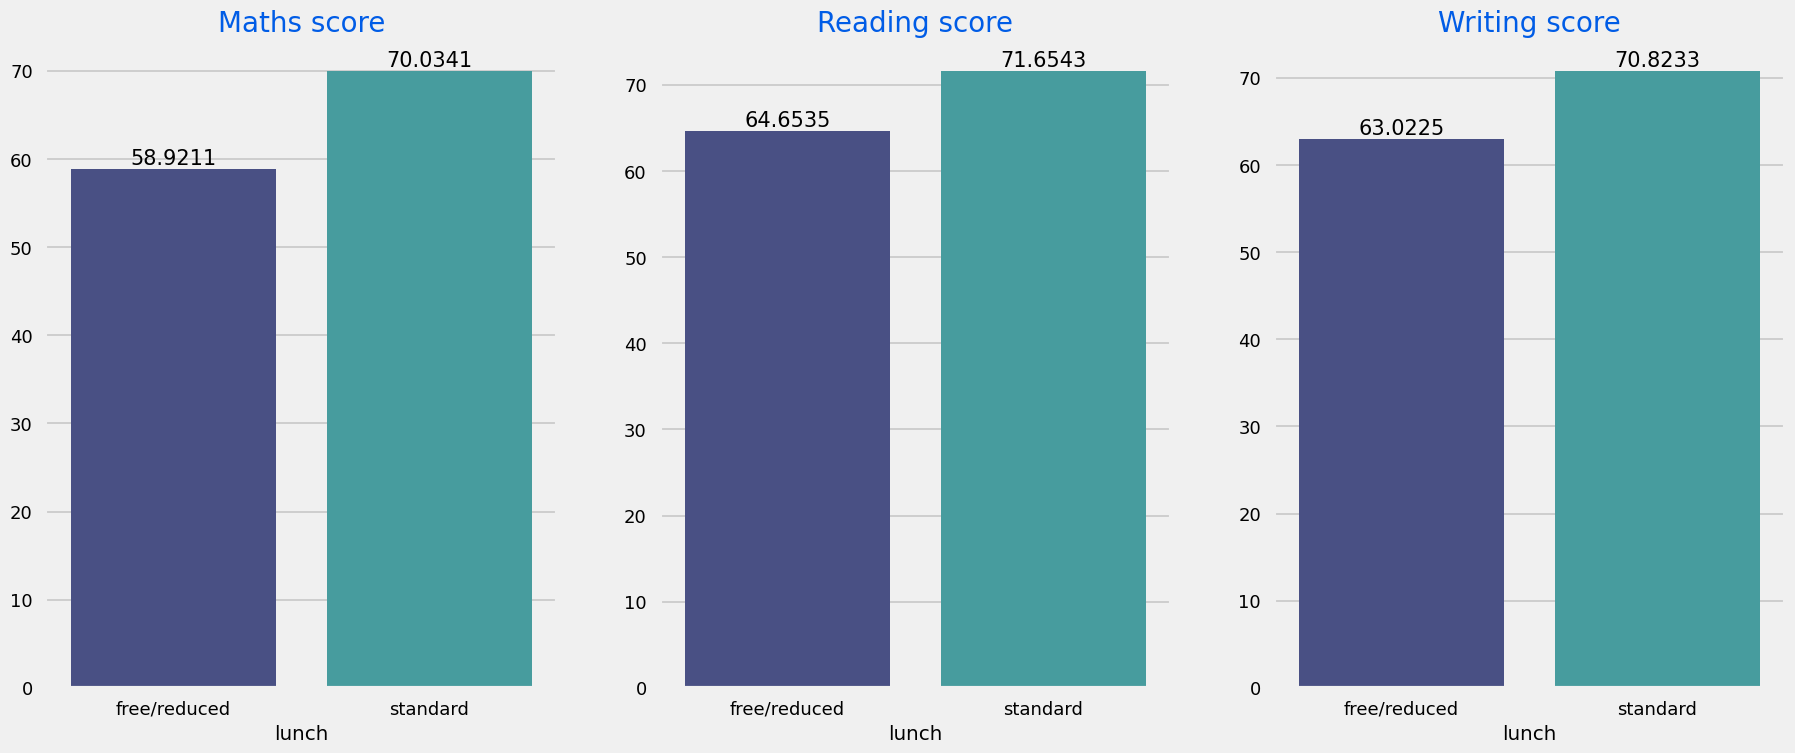

In [30]:
group_data3 = df.groupby('lunch')

f,ax = plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=group_data3['math_score'].mean().index,y=group_data3['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Maths score',color='#005ce6',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=group_data3['reading_score'].mean().index,y=group_data3['reading_score'].mean().values,palette='mako',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)
    
sns.barplot(x=group_data3['writing_score'].mean().index,y=group_data3['writing_score'].mean().values,palette='mako',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights
 - Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COLUMN
 - Which type of lunch is most common amoung students ?
 - Is Test prepration course has any impact on student's performance ?

#### UNIVARIATE ANALYSIS (Which type of lunch is most common amoung students?)

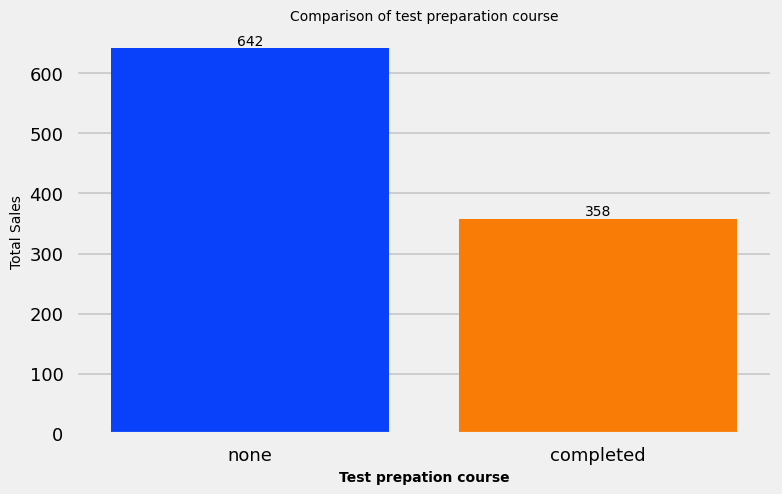

In [31]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x=df['test_preparation_course'],data=df,palette='bright',saturation=0.95)
plt.xlabel('Test prepation course', size=10, weight=900)
plt.ylabel('Total Sales', size=10)
plt.title('Comparison of test preparation course',size=10)
for container in ax.containers:
    ax.bar_label(container,color='black',size=10)

#### Insights
 - Students who didn't completed the test preparation course is more than completed

#### BIVARIATE ANALYSIS (Is Test prepration course has any impact on student's performance ?)

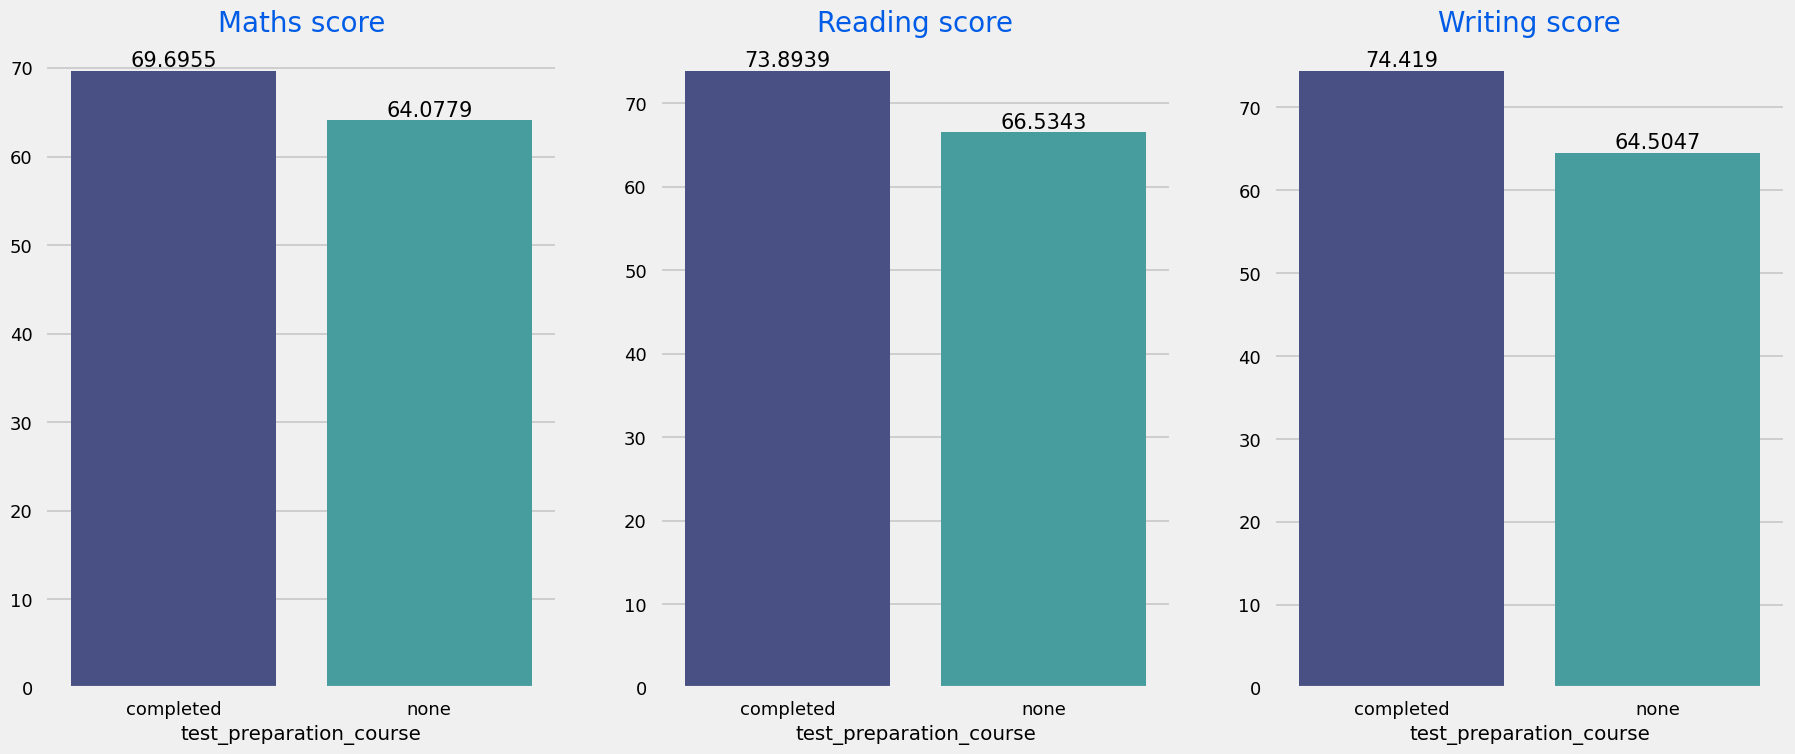

In [32]:
group_data4 = df.groupby('test_preparation_course')

f,ax = plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=group_data4['math_score'].mean().index,y=group_data4['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Maths score',color='#005ce6',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=group_data4['reading_score'].mean().index,y=group_data4['reading_score'].mean().values,palette='mako',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)
    
sns.barplot(x=group_data4['writing_score'].mean().index,y=group_data4['writing_score'].mean().values,palette='mako',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights
 - Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

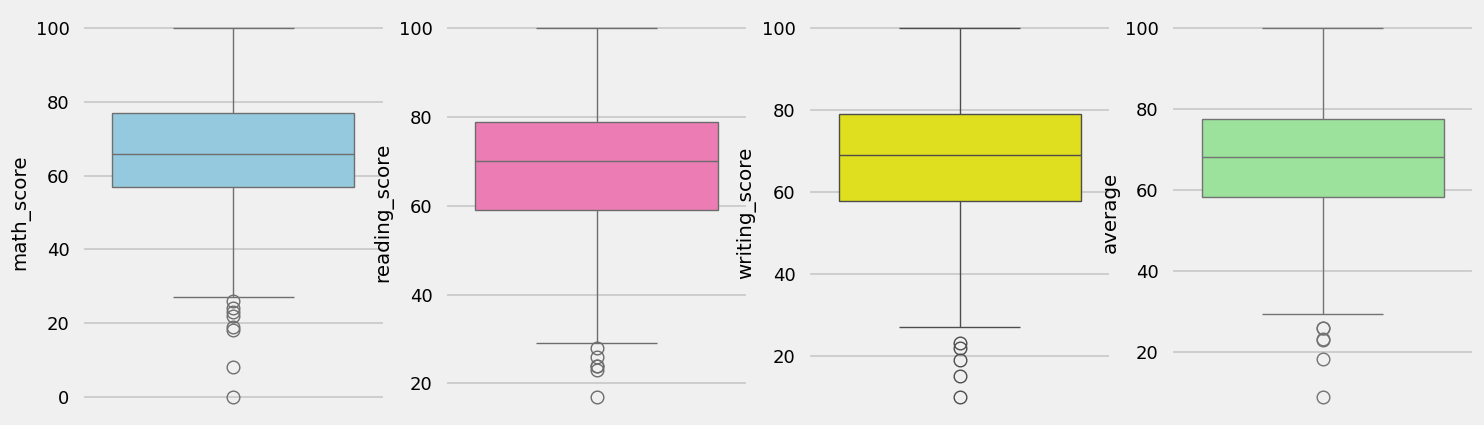

In [33]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MULTIVARIATE ANALYSIS USING PAIRPLOT

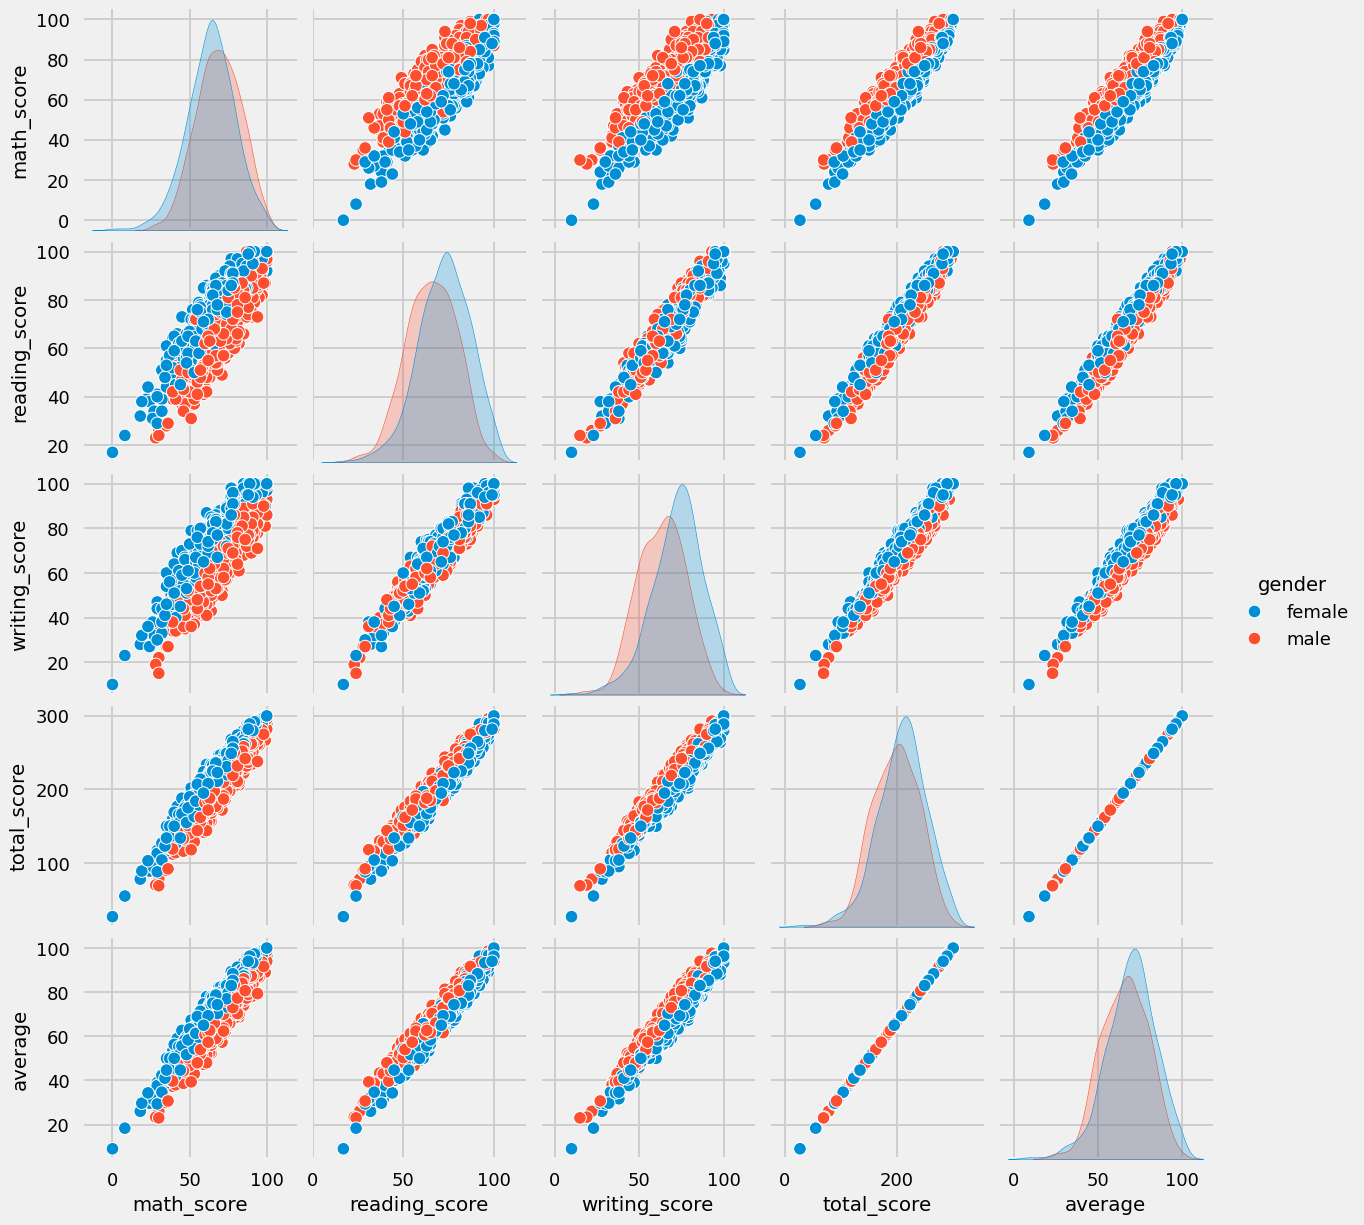

In [35]:
sns.pairplot(df,hue='gender')
plt.show()

#### Insights
 - From the above plot it is clear that all the scores increase linearly with each other.

### CONCLUSIONS

 - Student's Performance is related with lunch, race, parental level education
 - Females lead in pass percentage and also are top-scorers
 - Student's Performance is not much related with test preparation course
 - Finishing preparation course is benefitial.